In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import datetime
import gc
import pickle
from tqdm import tqdm_notebook as tqdm

from pathlib import Path
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
root = Path(r'C:\Users\Patrick Fu\Google trends for buildings\Dataset\GEPIII_dataset')

df_train = pd.read_feather(root/'train.feather')

weather_train = pd.read_feather(root/'weather_train.feather')
weather_test = pd.read_feather(root/'weather_test.feather')

building = pd.read_feather(root/'building_metadata.feather')
le = LabelEncoder()
building.primary_use = le.fit_transform(building.primary_use)

Wall time: 142 ms


In [3]:
%%time
df_train = df_train.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-20 18")')
df_train = df_train.query('not (building_id == 681 & meter == 0 & timestamp <= "2016-04-27")')
df_train = df_train.query('not (building_id == 761 & meter == 0 & timestamp <= "2016-09-02")')
df_train = df_train.query('not (building_id == 799 & meter == 0 & timestamp <= "2016-09-02")')
df_train = df_train.query('not (building_id == 802 & meter == 0 & timestamp <= "2016-08-24")')
df_train = df_train.query('not (building_id == 1073 & meter == 0 & timestamp <= "2016-10-26")')
df_train = df_train.query('not (building_id == 1094 & meter == 0 & timestamp <= "2016-09-08")')
df_train = df_train.query('not (building_id == 29 & meter == 0 & timestamp <= "2016-08-10")')
df_train = df_train.query('not (building_id == 40 & meter == 0 & timestamp <= "2016-06-04")')
df_train = df_train.query('not (building_id == 45 & meter == 0 & timestamp <= "2016-07")')
df_train = df_train.query('not (building_id == 106 & meter == 0 & timestamp <= "2016-11")')
df_train = df_train.query('not (building_id == 107 & meter == 0 & timestamp >= "2016-11-10")')
df_train = df_train.query('not (building_id == 112 & meter == 0 & timestamp < "2016-10-31 15")')
df_train = df_train.query('not (building_id == 144 & meter == 0 & timestamp > "2016-05-14" & timestamp < "2016-10-31")')
df_train = df_train.query('not (building_id == 147 & meter == 0 & timestamp > "2016-06-05 19" & timestamp < "2016-07-18 15")')
df_train = df_train.query('not (building_id == 171 & meter == 0 & timestamp <= "2016-07-05")')
df_train = df_train.query('not (building_id == 177 & meter == 0 & timestamp > "2016-06-04" & timestamp < "2016-06-25")')
df_train = df_train.query('not (building_id == 258 & meter == 0 & timestamp > "2016-09-26" & timestamp < "2016-12-12")')
df_train = df_train.query('not (building_id == 258 & meter == 0 & timestamp > "2016-08-30" & timestamp < "2016-09-08")')
df_train = df_train.query('not (building_id == 258 & meter == 0 & timestamp > "2016-09-18" & timestamp < "2016-09-25")')
df_train = df_train.query('not (building_id == 260 & meter == 0 & timestamp <= "2016-05-11")')
df_train = df_train.query('not (building_id == 269 & meter == 0 & timestamp > "2016-06-04" & timestamp < "2016-06-25")')
df_train = df_train.query('not (building_id == 304 & meter == 0 & timestamp >= "2016-11-20")')
df_train = df_train.query('not (building_id == 545 & meter == 0 & timestamp > "2016-01-17" & timestamp < "2016-02-10")')
df_train = df_train.query('not (building_id == 604 & meter == 0 & timestamp < "2016-11-21")')
df_train = df_train.query('not (building_id == 693 & meter == 0 & timestamp > "2016-09-07" & timestamp < "2016-11-23")')
df_train = df_train.query('not (building_id == 693 & meter == 0 & timestamp > "2016-07-12" & timestamp < "2016-05-29")')
df_train = df_train.query('not (building_id == 723 & meter == 0 & timestamp > "2016-10-06" & timestamp < "2016-11-22")')
df_train = df_train.query('not (building_id == 733 & meter == 0 & timestamp > "2016-05-29" & timestamp < "2016-06-22")')
df_train = df_train.query('not (building_id == 733 & meter == 0 & timestamp > "2016-05-19" & timestamp < "2016-05-20")')
df_train = df_train.query('not (building_id == 803 & meter == 0 & timestamp > "2016-9-25")')
df_train = df_train.query('not (building_id == 815 & meter == 0 & timestamp > "2016-05-17" & timestamp < "2016-11-17")')
df_train = df_train.query('not (building_id == 848 & meter == 0 & timestamp > "2016-01-15" & timestamp < "2016-03-20")')
df_train = df_train.query('not (building_id == 857 & meter == 0 & timestamp > "2016-04-13")')
df_train = df_train.query('not (building_id == 909 & meter == 0 & timestamp < "2016-02-02")')
df_train = df_train.query('not (building_id == 909 & meter == 0 & timestamp < "2016-06-23")')
df_train = df_train.query('not (building_id == 1008 & meter == 0 & timestamp > "2016-10-30" & timestamp < "2016-11-21")')
df_train = df_train.query('not (building_id == 1113 & meter == 0 & timestamp < "2016-07-27")')
df_train = df_train.query('not (building_id == 1153 & meter == 0 & timestamp < "2016-01-20")')
df_train = df_train.query('not (building_id == 1169 & meter == 0 & timestamp < "2016-08-03")')
df_train = df_train.query('not (building_id == 1170 & meter == 0 & timestamp > "2016-06-30" & timestamp < "2016-07-05")')
df_train = df_train.query('not (building_id == 1221 & meter == 0 & timestamp < "2016-11-04")')
df_train = df_train.query('not (building_id == 1225 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1234 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1233 & building_id <= 1234 & meter == 0 & timestamp > "2016-01-13 22" & timestamp < "2016-03-08 12")')
df_train = df_train.query('not (building_id == 1241 & meter == 0 & timestamp > "2016-07-14" & timestamp < "2016-11-19")')
df_train = df_train.query('not (building_id == 1250 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1255 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1264 & meter == 0 & timestamp > "2016-08-23")')
df_train = df_train.query('not (building_id == 1265 & meter == 0 & timestamp > "2016-05-06" & timestamp < "2016-05-26")')
df_train = df_train.query('not (building_id == 1272 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1275 & building_id <= 1280 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1283 & meter == 0 & timestamp > "2016-07-08" & timestamp < "2016-08-03")')
df_train = df_train.query('not (building_id >= 1291 & building_id <= 1302 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1303 & meter == 0 & timestamp > "2016-07-25 22" & timestamp < "2016-07-27 16")')
df_train = df_train.query('not (building_id == 1303 & meter == 0 & timestamp > "2016-01-26" & timestamp < "2016-06-02 12")')
df_train = df_train.query('not (building_id == 1319 & meter == 0 & timestamp > "2016-05-17 16" & timestamp < "2016-06-07 12")')
df_train = df_train.query('not (building_id == 1319 & meter == 0 & timestamp > "2016-08-18 14" & timestamp < "2016-09-02 14")')
df_train = df_train.query('not (building_id == 1322 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')

# 2nd cleaning
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-10-14 22" & timestamp < "2016-10-17 08")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-07-01 14" & timestamp < "2016-07-05 06")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-10-14 22" & timestamp < "2016-10-17 08")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-07-01 14" & timestamp < "2016-07-05 06")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-10-14 22" & timestamp < "2016-10-17 08")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-07-01 14" & timestamp < "2016-07-05 06")')
df_train = df_train.query('not (building_id == 1272 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1291 & building_id <= 1297 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1300 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1302 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1291 & building_id <= 1299 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1221 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1225 & building_id <= 1226 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1233 & building_id <= 1234 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1241 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1223 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1226 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1233 & building_id <= 1234 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1225 & building_id <= 1226 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1305 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1307 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1223 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1231 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1233 & building_id <= 1234 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1272 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1275 & building_id <= 1297 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1300 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1302 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1293 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-25 12")')
df_train = df_train.query('not (building_id == 1302 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-25 12")')
df_train = df_train.query('not (building_id == 1223 & meter == 0 & timestamp > "2016-9-28 07" & timestamp < "2016-10-11 18")')
df_train = df_train.query('not (building_id == 1225 & meter == 1 & timestamp > "2016-8-22 23" & timestamp < "2016-10-11 14")')
df_train = df_train.query('not (building_id == 1230 & meter == 1 & timestamp > "2016-8-22 08" & timestamp < "2016-10-05 18")')
df_train = df_train.query('not (building_id == 904 & meter == 0 & timestamp < "2016-02-17 08")')
df_train = df_train.query('not (building_id == 986 & meter == 0 & timestamp < "2016-02-17 08")')
df_train = df_train.query('not (building_id == 954 & meter == 0 & timestamp < "2016-08-08 11")')
df_train = df_train.query('not (building_id == 954 & meter == 0 & timestamp < "2016-06-23 08")')
df_train = df_train.query('not (building_id >= 745 & building_id <= 770 & meter == 1 & timestamp > "2016-10-05 01" & timestamp < "2016-10-10 09")')
df_train = df_train.query('not (building_id >= 774 & building_id <= 787 & meter == 1 & timestamp > "2016-10-05 01" & timestamp < "2016-10-10 09")')

# 3rd cleaning hourly spikes
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-05-11 09" & timestamp < "2016-05-12 01")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-05-11 09" & timestamp < "2016-05-12 01")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-05-11 09" & timestamp < "2016-05-12 01")')

df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp == "2016-02-26 01")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp == "2016-02-26 01")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp == "2016-02-26 01")')

df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-03-29 10" & timestamp < "2016-03-30 12")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-03-29 10" & timestamp < "2016-03-30 12")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-03-29 10" & timestamp < "2016-03-30 12")')

df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-01-19 23" & timestamp < "2016-01-28 15")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-01-19 23" & timestamp < "2016-01-28 15")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-01-19 23" & timestamp < "2016-01-28 15")')

df_train = df_train.query('not (building_id != 1227 & building_id != 1281 & building_id != 1314 & building_id >=1223 & building_id < 1335 & meter==0 & meter_reading==0)')

# 4th cleaning (using hindsight from leaks)
df_train = df_train.query('not (building_id >= 1223 & building_id <= 1324 & meter==1 & timestamp > "2016-07-16 04" & timestamp < "2016-07-19 11")')
df_train = df_train.query('not (building_id == 107 & meter == 0 & timestamp <= "2016-07-06")')
# df_train = df_train.query('not (building_id == 53 & meter == 0)')
df_train = df_train.query('not (building_id == 180 & timestamp >= "2016-02-17 12")')
df_train = df_train.query('not (building_id == 182 & meter == 0)')
df_train = df_train.query('not (building_id == 191 & meter == 0 & timestamp >= "2016-12-22 09")')
df_train = df_train.query('not (building_id == 192 & meter == 1 & timestamp >= "2016-05-09 18")')
df_train = df_train.query('not (building_id == 192 & meter == 3 & timestamp >= "2016-03-29 05" & timestamp <= "2016-04-04 08")')
df_train = df_train.query('not (building_id == 207 & meter == 1 & timestamp > "2016-07-02 20" & timestamp < "2016-08-25 12")')
# df_train = df_train.query('not (building_id == 218)')
df_train = df_train.query('not (building_id == 258 & timestamp > "2016-09-18" & timestamp < "2016-12-12 13")')
df_train = df_train.query('not (building_id == 258 & timestamp > "2016-08-29 08" & timestamp < "2016-09-08 14")')
df_train = df_train.query('not (building_id == 257 & meter == 1 & timestamp < "2016-03-25 16")')
df_train = df_train.query('not (building_id == 260 & meter == 1 & timestamp > "2016-05-10 17" & timestamp < "2016-08-17 11")')
df_train = df_train.query('not (building_id == 260 & meter == 1 & timestamp > "2016-08-28 01" & timestamp < "2016-10-31 13")')
# df_train = df_train.query('not (building_id == 279 & meter == 3)')
# df_train = df_train.query('not (building_id == 287 & meter == 1)')
# df_train = df_train.query('not (building_id == 287 & meter == 3)')
df_train = df_train.query('not (building_id == 220 & meter == 1 & timestamp > "2016-09-23 01" & timestamp < "2016-09-23 12")')
df_train = df_train.query('not (building_id == 281 & meter == 1 & timestamp > "2016-10-25 08" & timestamp < "2016-11-04 15")')
df_train = df_train.query('not (building_id == 273 & meter == 1 & timestamp > "2016-04-03 04" & timestamp < "2016-04-29 15")')
df_train = df_train.query('not (building_id == 28 & meter == 0 & timestamp < "2016-10-14 20")')
df_train = df_train.query('not (building_id == 71 & meter == 0 & timestamp < "2016-08-18 20")')
df_train = df_train.query('not (building_id == 76 & meter == 0 & timestamp > "2016-06-04 09" & timestamp < "2016-06-04 14")')
df_train = df_train.query('not (building_id == 101 & meter == 0 & timestamp > "2016-10-12 13" & timestamp < "2016-10-12 18")')
df_train = df_train.query('not (building_id == 7 & meter == 1 & timestamp > "2016-11-03 09" & timestamp < "2016-11-28 14")')
df_train = df_train.query('not (building_id == 9 & meter == 1 & timestamp > "2016-12-06 08")')
df_train = df_train.query('not (building_id == 43 & meter == 1 & timestamp > "2016-04-03 08" & timestamp < "2016-06-06 13")')
df_train = df_train.query('not (building_id == 60 & meter == 1 & timestamp > "2016-05-01 17" & timestamp < "2016-05-01 21")')
df_train = df_train.query('not (building_id == 75 & meter == 1 & timestamp > "2016-08-05 13" & timestamp < "2016-08-26 12")')
df_train = df_train.query('not (building_id == 95 & meter == 1 & timestamp > "2016-08-08 10" & timestamp < "2016-08-26 13")')
df_train = df_train.query('not (building_id == 97 & meter == 1 & timestamp > "2016-08-08 14" & timestamp < "2016-08-25 14")')
df_train = df_train.query('not (building_id == 1232 & meter == 1 & timestamp > "2016-06-23 16" & timestamp < "2016-08-31 20")')
df_train = df_train.query('not (building_id == 1236 & meter == 1 & meter_reading >= 3000)')
df_train = df_train.query('not (building_id == 1239 & meter == 1 & timestamp > "2016-03-11 16" & timestamp < "2016-03-27 17")')
df_train = df_train.query('not (building_id == 1264 & meter == 1 & timestamp > "2016-08-22 17" & timestamp < "2016-09-22 20")')
df_train = df_train.query('not (building_id == 1264 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1269 & meter == 1 & meter_reading >= 2000)')
df_train = df_train.query('not (building_id == 1272 & meter == 1 & timestamp > "2016-08-11 12" & timestamp < "2016-08-30 19")')
df_train = df_train.query('not (building_id == 1273 & meter == 1 & timestamp > "2016-05-31 14" & timestamp < "2016-06-17")')
df_train = df_train.query('not (building_id == 1276 & meter == 1 & timestamp < "2016-02-03 23")')
df_train = df_train.query('not (building_id == 1280 & meter == 1 & timestamp > "2016-05-18" & timestamp < "2016-05-26 09")')
df_train = df_train.query('not (building_id == 1280 & meter == 1 & timestamp > "2016-02-28 23" & timestamp < "2016-05-02 05")')
df_train = df_train.query('not (building_id == 1280 & meter == 1 & timestamp > "2016-06-12 01" & timestamp < "2016-7-07 06")')
df_train = df_train.query('not (building_id == 1288 & meter == 1 & timestamp > "2016-07-07 15" & timestamp < "2016-08-12 17")')
df_train = df_train.query('not (building_id == 1311 & meter == 1 & timestamp > "2016-04-25 18" & timestamp < "2016-05-13 14")')
df_train = df_train.query('not (building_id == 1099 & meter == 2)')

df_train = df_train.query('not (building_id == 1329 & meter == 0 & timestamp > "2016-04-28 00" & timestamp < "2016-04-28 07")')
df_train = df_train.query('not (building_id == 1331 & meter == 0 & timestamp > "2016-04-28 00" & timestamp < "2016-04-28 07")')
df_train = df_train.query('not (building_id == 1427 & meter == 0 & timestamp > "2016-04-11 10" & timestamp < "2016-04-11 14")')
df_train = df_train.query('not (building_id == 1426 & meter == 2 & timestamp > "2016-05-03 09" & timestamp < "2016-05-03 14")')
df_train = df_train.query('not (building_id == 1345 & meter == 0 & timestamp < "2016-03-01")')
df_train = df_train.query('not (building_id == 1346 & timestamp < "2016-03-01")')
df_train = df_train.query('not (building_id == 1359 & meter == 0 & timestamp > "2016-04-25 17" & timestamp < "2016-07-22 14")')
df_train = df_train.query('not (building_id == 1365 & meter == 0 & timestamp > "2016-08-19 00" & timestamp < "2016-08-19 07")')
df_train = df_train.query('not (building_id == 1365 & meter == 0 & timestamp > "2016-06-18 22" & timestamp < "2016-06-19 06")')

df_train = df_train.query('not (building_id == 18 & meter == 0 & timestamp > "2016-06-04 09" & timestamp < "2016-06-04 16")')
df_train = df_train.query('not (building_id == 18 & meter == 0 & timestamp > "2016-11-05 05" & timestamp < "2016-11-05 15")')
df_train = df_train.query('not (building_id == 101 & meter == 0 & meter_reading > 800)')

df_train = df_train.query('not (building_id == 1384 & meter == 0 & meter_reading == 0 )')
df_train = df_train.query('not (building_id >= 1289 & building_id <= 1301 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1243 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1263 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1284 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1286 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1263 & meter == 0 & timestamp > "2016-11-10 11" & timestamp < "2016-11-10 15")')

df_train = df_train.query('not (building_id == 1238 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1329 & meter == 2 & timestamp > "2016-11-21 12" & timestamp < "2016-11-29 12")')
df_train = df_train.query('not (building_id == 1249 & meter == 2 & meter_reading == 0)')

df_train = df_train.query('not (building_id == 1250 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-03-05 18" & timestamp < "2016-03-05 22")')
df_train = df_train.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-03-27 00" & timestamp < "2016-03-27 23")')
df_train = df_train.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-04-11 09" & timestamp < "2016-04-13 03")')
df_train = df_train.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-04-29 00" & timestamp < "2016-04-30 15")')
df_train = df_train.query('not (building_id == 1303 & meter == 2 & timestamp < "2016-06-06 19")')
df_train = df_train.query('not (building_id >= 1223 & building_id <= 1324 & meter == 1 & timestamp > "2016-08-11 17" & timestamp < "2016-08-12 17")')
df_train = df_train.query('not (building_id >= 1223 & building_id <= 1324 & building_id != 1296 & building_id != 129 & building_id != 1298 & building_id != 1299 & meter == 2 & timestamp > "2016-08-11 17" & timestamp < "2016-08-12 17")')
df_train = df_train.query('not (building_id >= 1223 & building_id <= 1324 & meter == 3 & timestamp > "2016-08-11 17" & timestamp < "2016-08-12 17")')


Wall time: 2min 8s


In [4]:
# # Remove outliers
# df_train = df_train [ df_train['building_id'] != 1099 ]
# df_train = df_train.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-20")')

In [5]:
# # building_meter map

# bm_cols = ['bm', 'weekday', 'hour',]
# df_train['hour'] = df_train['timestamp'].dt.hour
# df_train['weekday'] = df_train['timestamp'].dt.weekday
# df_train['bm'] = df_train['building_id'].apply(lambda x: str(x)) + '_' + df_train['meter'].apply(lambda x: str(x))
# bm = df_train.groupby(bm_cols)['meter_reading'].mean().rename('bm_week_hour').to_frame()

In [6]:
# df_train = df_train.merge(bm, right_index=True, left_on=bm_cols, how='left')
# df_train.drop(['bm'], axis=1, inplace=True)
# df_train.head()

## Utility Functions

In [7]:
# Original code from https://www.kaggle.com/aitude/ashrae-missing-weather-data-handling by @aitude

def fill_weather_dataset(weather_df):
    
    # Find Missing Dates
    time_format = "%Y-%m-%d %H:%M:%S"
    start_date = datetime.datetime.strptime(weather_df['timestamp'].min(),time_format)
    end_date = datetime.datetime.strptime(weather_df['timestamp'].max(),time_format)
    total_hours = int(((end_date - start_date).total_seconds() + 3600) / 3600)
    hours_list = [(end_date - datetime.timedelta(hours=x)).strftime(time_format) for x in range(total_hours)]
    
    missing_hours = []
    for site_id in range(16):
        site_hours = np.array(weather_df[weather_df['site_id'] == site_id]['timestamp'])
        new_rows = pd.DataFrame(np.setdiff1d(hours_list,site_hours),columns=['timestamp'])
        new_rows['site_id'] = site_id
        weather_df = pd.concat([weather_df,new_rows])

        weather_df = weather_df.reset_index(drop=True)           

    # Add new Features
    weather_df["timestamp"] = pd.to_datetime(weather_df["timestamp"])
    weather_df["day"] = weather_df["timestamp"].dt.day
    weather_df["week"] = weather_df["timestamp"].dt.week
    weather_df["month"] = weather_df["timestamp"].dt.month
    
    # Reset Index for Fast Update
    weather_df = weather_df.set_index(['site_id','day','month'])

    air_temperature_filler = pd.DataFrame(weather_df.groupby(['site_id','day','month'])['air_temperature'].mean(),columns=["air_temperature"])
    weather_df.update(air_temperature_filler,overwrite=False)

    # Step 1
    cloud_coverage_filler = weather_df.groupby(['site_id','day','month'])['cloud_coverage'].mean()
    # Step 2
    cloud_coverage_filler = pd.DataFrame(cloud_coverage_filler.fillna(method='ffill'),columns=["cloud_coverage"])

    weather_df.update(cloud_coverage_filler,overwrite=False)

    due_temperature_filler = pd.DataFrame(weather_df.groupby(['site_id','day','month'])['dew_temperature'].mean(),columns=["dew_temperature"])
    weather_df.update(due_temperature_filler,overwrite=False)

    # Step 1
    sea_level_filler = weather_df.groupby(['site_id','day','month'])['sea_level_pressure'].mean()
    # Step 2
    sea_level_filler = pd.DataFrame(sea_level_filler.fillna(method='ffill'),columns=['sea_level_pressure'])

    weather_df.update(sea_level_filler,overwrite=False)

    wind_direction_filler =  pd.DataFrame(weather_df.groupby(['site_id','day','month'])['wind_direction'].mean(),columns=['wind_direction'])
    weather_df.update(wind_direction_filler,overwrite=False)

    wind_speed_filler =  pd.DataFrame(weather_df.groupby(['site_id','day','month'])['wind_speed'].mean(),columns=['wind_speed'])
    weather_df.update(wind_speed_filler,overwrite=False)

    # Step 1
    precip_depth_filler = weather_df.groupby(['site_id','day','month'])['precip_depth_1_hr'].mean()
    # Step 2
    precip_depth_filler = pd.DataFrame(precip_depth_filler.fillna(method='ffill'),columns=['precip_depth_1_hr'])

    weather_df.update(precip_depth_filler,overwrite=False)

    weather_df = weather_df.reset_index()
    weather_df = weather_df.drop(['day','week','month'],axis=1)
        
    return weather_df

# Original code from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage by @gemartin

from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def features_engineering(df):
    
    # Sort by timestamp
    df.sort_values("timestamp")
    df.reset_index(drop=True)
    
    # Add more features
    df["timestamp"] = pd.to_datetime(df["timestamp"],format="%Y-%m-%d %H:%M:%S")
    df["hour"] = df["timestamp"].dt.hour
    df["weekday"] = df["timestamp"].dt.weekday
    
    df['square_feet'] =  np.log1p(df['square_feet'])
    df['sm'] = df['site_id'].apply(lambda x: str(x)) + '_' + df['meter'].apply(lambda x: str(x))
    
    
    # Remove Unused Columns
    drop = ["timestamp",'site_id',"sea_level_pressure", "wind_direction", "wind_speed","year_built","floor_count"]
    df = df.drop(drop, axis=1)
    gc.collect()
    
    # Encode Categorical Data
    le = LabelEncoder()
    df["primary_use"] = le.fit_transform(df["primary_use"])
    
    # reduce memory
    df = reduce_mem_usage(df, use_float16=True)
    
    return df

In [8]:
def rmse(ytrue, ypred):
    return np.sqrt(np.mean(np.square(ypred - ytrue), axis=0))
def rmsle(ytrue, ypred):
    return np.sqrt(np.mean(np.square(np.log1p(ypred) - np.log1p(ytrue)), axis=0))

## Fill Weather Information

I'm using [this kernel](https://www.kaggle.com/aitude/ashrae-missing-weather-data-handling) to handle missing weather information.

In [9]:
weather_train['timestamp'] = weather_train['timestamp'].astype('str')
weather_train = fill_weather_dataset(weather_train)

## Memory Reduction

In [10]:
df_train = reduce_mem_usage(df_train,use_float16=True)
building = reduce_mem_usage(building,use_float16=True)
weather_train = reduce_mem_usage(weather_train,use_float16=True)

Memory usage of dataframe is 426.99 MB
Memory usage after optimization is: 426.99 MB
Decreased by 0.0%
Memory usage of dataframe is 0.03 MB
Memory usage after optimization is: 0.02 MB
Decreased by 36.7%
Memory usage of dataframe is 5.90 MB
Memory usage after optimization is: 3.08 MB
Decreased by 47.7%


## Merge Data

We need to add building and weather information into training dataset.

In [11]:
df_train = df_train.merge(building, left_on='building_id',right_on='building_id',how='left')
df_train = df_train.merge(weather_train,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
del weather_train
gc.collect()

40

## Features Engineering

In [12]:
%%time
df_train = features_engineering(df_train)

Memory usage of dataframe is 1169.58 MB
Memory usage after optimization is: 538.38 MB
Decreased by 54.0%
Wall time: 21.1 s


In [13]:
df_train.head()

,building_id,meter,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,hour,weekday,sm
0,105,0,23.303600,0,10.835938,3.800781,0.0,2.400391,0.0,0,4,1_0
1,106,3,0.000000,0,8.585938,3.800781,0.0,2.400391,0.0,0,4,1_3
2,108,0,91.265297,0,11.312500,3.800781,0.0,2.400391,0.0,0,4,1_0
3,109,0,80.930000,0,10.953125,3.800781,0.0,2.400391,0.0,0,4,1_0
4,109,3,0.000000,0,10.953125,3.800781,0.0,2.400391,0.0,0,4,1_3


## Features & Target Variables

In [14]:
y_train = np.log1p(df_train["meter_reading"])
X_train = df_train.drop('meter_reading', axis = 1)

##  KFOLD LIGHTGBM Model

In [15]:
%%time
categorical_features = ['sm', "building_id", "meter", "primary_use", "weekday"]
params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 1280,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse",
}

pred_L1 = []
valid_L1 = []
seed = None
kf = KFold(n_splits=3, random_state=seed)

models = []
for train_index,test_index in kf.split(X_train):
    train_features = X_train.loc[train_index]
    train_target = y_train.loc[train_index]
    
    test_features = X_train.loc[test_index]
    test_target = y_train.loc[test_index]
    
    d_training = lgb.Dataset(train_features, label=train_target,categorical_feature=categorical_features, free_raw_data=False)
    d_test = lgb.Dataset(test_features, label=test_target,categorical_feature=categorical_features, free_raw_data=False)
    
    model = lgb.train(params, train_set=d_training, num_boost_round=1000, valid_sets=[d_training,d_test], verbose_eval=25, early_stopping_rounds=50)
    models.append(model)
    pred_L1.append(model.predict(test_features))
    valid_L1.append(test_target)
    
    del train_features, train_target, test_features, test_target, d_training, d_test
    gc.collect()

Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.959242	valid_1's rmse: 1.13222
[50]	training's rmse: 0.753433	valid_1's rmse: 1.00078
[75]	training's rmse: 0.70235	valid_1's rmse: 0.984328
[100]	training's rmse: 0.678344	valid_1's rmse: 0.981712
[125]	training's rmse: 0.661012	valid_1's rmse: 0.982124
[150]	training's rmse: 0.647988	valid_1's rmse: 0.983433
Early stopping, best iteration is:
[111]	training's rmse: 0.670203	valid_1's rmse: 0.981538
Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 0.998146	valid_1's rmse: 1.08621
[50]	training's rmse: 0.802723	valid_1's rmse: 0.912788
[75]	training's rmse: 0.754555	valid_1's rmse: 0.874042
[100]	training's rmse: 0.729886	valid_1's rmse: 0.861562
[125]	training's rmse: 0.710284	valid_1's rmse: 0.85367
[150]	training's rmse: 0.696019	valid_1's rmse: 0.849697
[175]	training's rmse: 0.685401	valid_1's rmse: 0.848105
[200]	training's rmse: 0.678617	valid_1's rmse: 0.847475

In [16]:
del X_train, y_train
gc.collect()

20

## Important Features

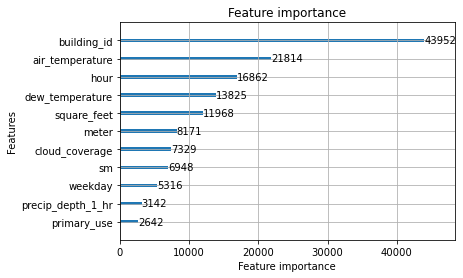

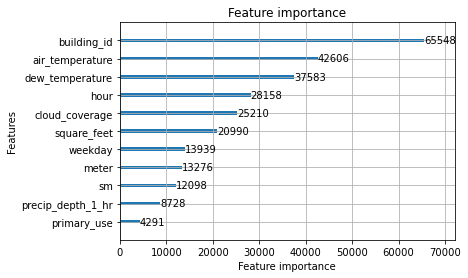

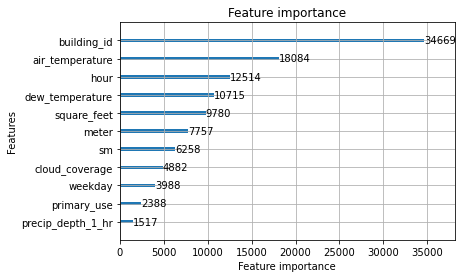

In [17]:
for model in models:
    lgb.plot_importance(model)
    plt.show()

## Load Test Data

In [18]:
df_test = pd.read_feather(root/'test.feather')

row_ids = df_test["row_id"]
df_test.drop("row_id", axis=1, inplace=True)
df_test = reduce_mem_usage(df_test)

Memory usage of dataframe is 437.43 MB
Memory usage after optimization is: 437.43 MB
Decreased by 0.0%


In [19]:
# df_test['hour'] = df_test['timestamp'].dt.hour
# df_test['weekday'] = df_test['timestamp'].dt.weekday
# df_test['bm'] = df_test['building_id'].apply(lambda x: str(x)) + '_' + df_test['meter'].apply(lambda x: str(x))
# df_test = df_test.merge(bm, right_index=True, left_on=bm_cols, how='left')
# df_test.drop('bm', axis=1, inplace=True)

## Merge Building Data

In [20]:
df_test = df_test.merge(building,left_on='building_id',right_on='building_id',how='left')

## Fill Weather Information

In [21]:
weather_test['timestamp'] = weather_test['timestamp'].astype('str')
weather_test = fill_weather_dataset(weather_test)
weather_test = reduce_mem_usage(weather_test)

Memory usage of dataframe is 11.76 MB
Memory usage after optimization is: 9.89 MB
Decreased by 15.9%


## Merge Weather Data

In [22]:
df_test = df_test.merge(weather_test,how='left',on=['timestamp','site_id'])
del weather_test
gc.collect()

20

## Features Engineering

In [23]:
df_test = features_engineering(df_test)

Memory usage of dataframe is 2664.32 MB
Memory usage after optimization is: 994.15 MB
Decreased by 62.7%


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41697600 entries, 0 to 41697599
Data columns (total 11 columns):
 #   Column             Dtype   
---  ------             -----   
 0   building_id        int16   
 1   meter              int8    
 2   primary_use        int8    
 3   square_feet        float16 
 4   air_temperature    float16 
 5   cloud_coverage     float16 
 6   dew_temperature    float16 
 7   precip_depth_1_hr  float16 
 8   hour               int8    
 9   weekday            int8    
 10  sm                 category
dtypes: category(1), float16(5), int16(1), int8(4)
memory usage: 994.1 MB


In [25]:
df_test.head()

,building_id,meter,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,hour,weekday,sm
0,0,0,0,8.914062,17.796875,4.0,11.703125,0.282715,0,6,0_0
1,1,0,0,7.910156,17.796875,4.0,11.703125,0.282715,0,6,0_0
2,2,0,0,8.593750,17.796875,4.0,11.703125,0.282715,0,6,0_0
3,3,0,0,10.070312,17.796875,4.0,11.703125,0.282715,0,6,0_0
4,4,0,0,11.664062,17.796875,4.0,11.703125,0.282715,0,6,0_0


## Prediction

In [26]:
%%time
pred = []
for model in tqdm(models):
    if  pred == []:
        pred = np.expm1(model.predict(df_test, num_iteration=model.best_iteration)) / len(models)
    else:
        pred += np.expm1(model.predict(df_test, num_iteration=model.best_iteration)) / len(models)
    del model
    gc.collect()


Wall time: 7min 49s


## Submission

In [28]:
submission = pd.DataFrame({"row_id": row_ids, "meter_reading": np.clip(pred, 0, a_max=None)})
gc.collect()
submission['meter_reading'] = submission['meter_reading'].astype('float32')
submission['row_id'] = submission['row_id'].astype('int32')
submission.to_csv("submission_baseline.csv", index=False, chunksize=25000)

In [29]:
submission.head()

,row_id,meter_reading
0,0,136.128433
1,1,74.436104
2,2,9.900030
3,3,255.450378
4,4,952.865906


In [30]:
print(f"submission mean: {submission['meter_reading'].mean():.4f}")
print(f"submission std: {submission['meter_reading'].std():.4f}")
print(f"submission min: {submission['meter_reading'].min():.4f}")
print(f"submission max: {submission['meter_reading'].max():.4f}")

submission mean: 352.7842
submission std: 1860.7054
submission min: 0.0000
submission max: 634506.6875


10

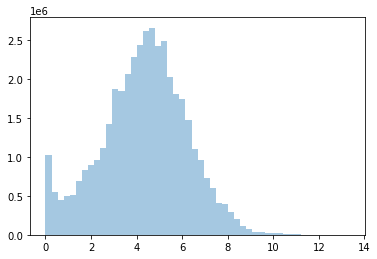

In [31]:
sns.distplot(np.log1p(submission['meter_reading'].values), kde=False);
gc.collect()

## Submission Validation

In [32]:
df_solution = pd.read_csv(os.path.join(root, 'solution.csv'))
df_solution = reduce_mem_usage(df_solution, use_float16=True)
df_solution

Memory usage of dataframe is 954.38 MB
Memory usage after optimization is: 357.89 MB
Decreased by 62.5%


,row_id,meter_reading,Usage
0,0,173.369995,Public
1,1,53.512699,Public
2,2,6.143000,Public
3,3,101.700996,Public
4,4,1141.239990,Public
...,...,...,...
41697595,41697595,-9999.000000,Ignored
41697596,41697596,-9999.000000,Ignored
41697597,41697597,-9999.000000,Ignored
41697598,41697598,-9999.000000,Ignored


In [33]:
df_test = pd.read_feather(root/'test.feather')
merged = df_test.merge(df_solution,  on='row_id', how='left')
merged

,row_id,building_id,meter,timestamp,meter_reading,Usage
0,0,0,0,2017-01-01 00:00:00,173.369995,Public
1,1,1,0,2017-01-01 00:00:00,53.512699,Public
2,2,2,0,2017-01-01 00:00:00,6.143000,Public
3,3,3,0,2017-01-01 00:00:00,101.700996,Public
4,4,4,0,2017-01-01 00:00:00,1141.239990,Public
...,...,...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00,-9999.000000,Ignored
41697596,41697596,1445,0,2018-05-09 07:00:00,-9999.000000,Ignored
41697597,41697597,1446,0,2018-05-09 07:00:00,-9999.000000,Ignored
41697598,41697598,1447,0,2018-05-09 07:00:00,-9999.000000,Ignored


In [34]:
ytrue = df_solution.loc[merged['Usage']=='Private', 'meter_reading']
pred = submission.loc[merged['Usage']=='Private', 'meter_reading']

In [35]:
print(f'RMSLE: {rmsle(ytrue, pred):.4f}')

RMSLE: 1.2888


In [1]:
'''
building = pd.read_feather(root/'building_metadata.feather')
merged['meter_reading_pred'] = submission['meter_reading']

for building_id in building['building_id'].unique():
    for meter in np.arange(0, 4):
        df_plot = merged[(merged['building_id']==building_id)&(merged['meter']==meter)].sort_values('timestamp').set_index('timestamp').copy()
        df_plot = df_plot[df_plot['meter_reading']>0].loc['2017']
        #df_plot = df_plot[df_plot['Usage']!='Ignored']

        if len(df_plot)>0:
            print('R-squared: '+str(df_plot[['meter_reading','meter_reading_pred']].corr().iloc[0,1].round(3)))
            print('RMSLE: '+str(round(rmsle(df_plot['meter_reading'], df_plot['meter_reading_pred']), 2)))
            df_plot[['meter_reading','meter_reading_pred']].plot(figsize=(15,3),alpha=0.5,title='building_id: '+str(building_id)+' - meter: '+str(meter));plt.show()
            print('--------------------------------------------------------------------------------------------------------------------------') 
'''

"\nbuilding = pd.read_feather(root/'building_metadata.feather')\nmerged['meter_reading_pred'] = submission['meter_reading']\n\nfor building_id in building['building_id'].unique():\n    for meter in np.arange(0, 4):\n        df_plot = merged[(merged['building_id']==building_id)&(merged['meter']==meter)].sort_values('timestamp').set_index('timestamp').copy()\n        df_plot = df_plot[df_plot['meter_reading']>0].loc['2017']\n        #df_plot = df_plot[df_plot['Usage']!='Ignored']\n\n        if len(df_plot)>0:\n            print('R-squared: '+str(df_plot[['meter_reading','meter_reading_pred']].corr().iloc[0,1].round(3)))\n            print('RMSLE: '+str(round(rmsle(df_plot['meter_reading'], df_plot['meter_reading_pred']), 2)))\n            df_plot[['meter_reading','meter_reading_pred']].plot(figsize=(15,3),alpha=0.5,title='building_id: '+str(building_id)+' - meter: '+str(meter));plt.show()\n            print('--------------------------------------------------------------------------------